In [1]:
from texas import TexasHoldThem, deck
from cards import high_card_order, hand_rank, suits
import seaborn as sns

In [2]:
aa = [('ace', 'diamonds'), ('ace', 'spades')]

In [3]:
cards = [(suits.index(a[1]), high_card_order[a[0]]) for a in aa]

In [4]:
cards

[(1, 13), (3, 13)]

In [30]:
simulations = [sum([TexasHoldThem(10).win_loss(cards) for i in range(20)])/ 20 for i in range(1000)]

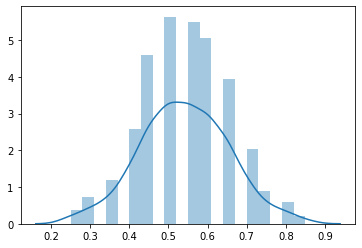

In [31]:
sns.distplot(simulations, bins = 20)